In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(cowplot)
    library(patchwork)
    library(colors3d)
    theme_set(theme_cowplot())
})
options(repr.plot.width=16,repr.plot.height=10)

# 2D Color Palette

## code

In [2]:
map_to_color2d <- function(data, xvar, yvar, colors=c("yellow", "green", "blue", "magenta"), size=5) {
    data |>
    summarize(
        min_x = min({{xvar}}), max_x = max({{xvar}}),
        min_y = min({{yvar}}), max_y = max({{yvar}})
    ) |>
    with(expand_grid(
        x = seq(min_x, max_x, length.out = size),
        y = seq(min_y, max_y, length.out = size)
    )) |>
    mutate(
        color = colors2d(tibble(x,y), xtrans = "rank", ytrans = "rank", colors=colors)
    ) |>
    ggplot(aes(x,y,fill=color)) +
    geom_raster() +
    scale_fill_identity() +
    labs(x=as_label(enquo(xvar)), y=as_label(enquo(yvar))) +
    coord_cartesian(expand=0) -> lgd

    data2 <-
    select(data, {{xvar}}, {{yvar}}) |>
    colors2d(xtrans = "rank", ytrans = "rank", colors=colors) |>
    bind_cols(data, color=_)

    list(data=data2, legend=lgd)
}

## example

In [3]:
head(iris,3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


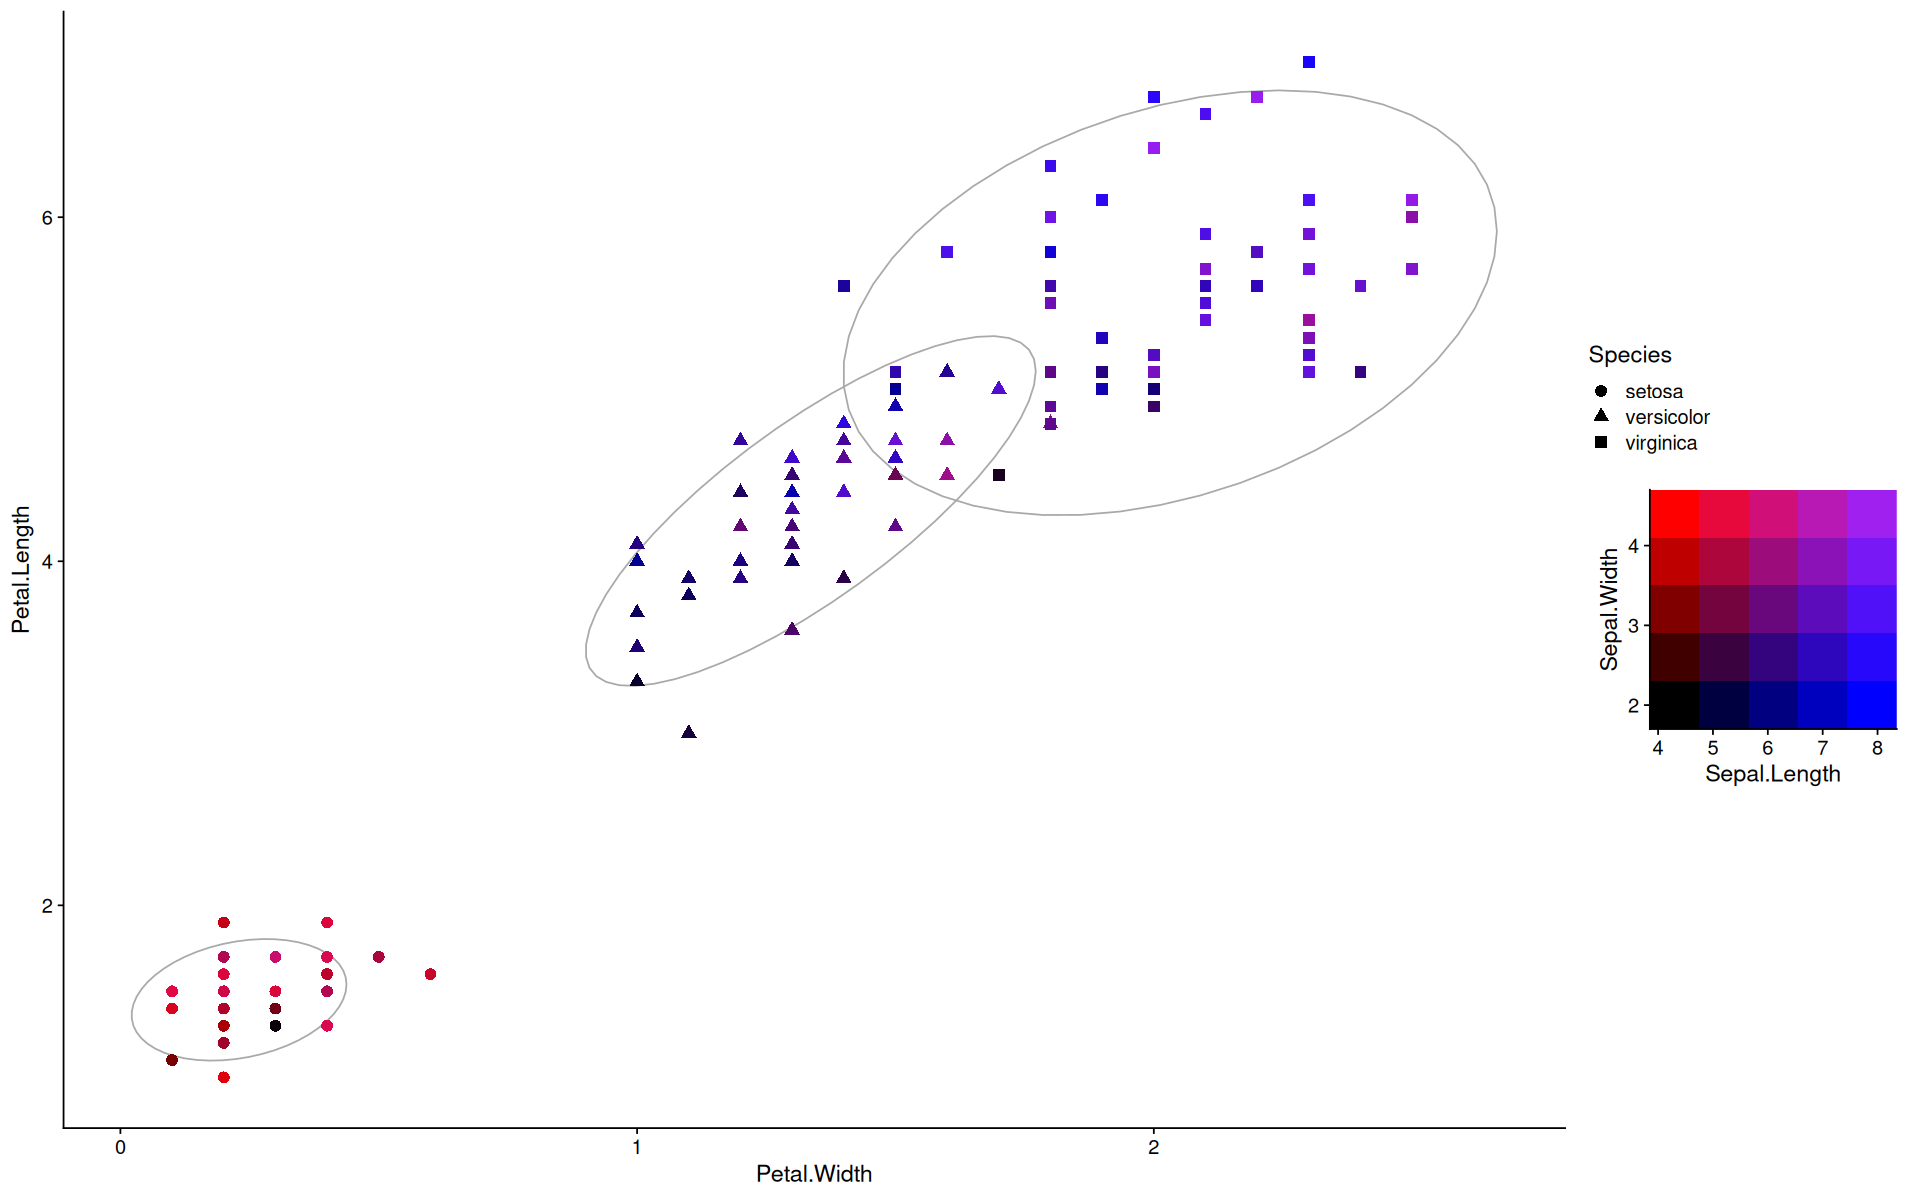

In [4]:
colors <- c('purple', 'blue', 'black', 'red')

r <- map_to_color2d(iris, xvar=Sepal.Length, yvar=Sepal.Width, colors=colors)

ggplot(r$data, aes(y=Petal.Length, x=Petal.Width, color=color, shape=Species, group=Species)) +
stat_ellipse(color='darkgray') +
geom_point(size=3) +
scale_color_identity() +
guides(custom = guide_custom(as_grob(r$legend), width=unit(0.4,'npc'), height=unit(0.4,'npc')))

## other palettes

In [5]:
library(pals)

In [40]:
arc.bluepink()

[1] "#ffffff" "#ffe6fe" "#ffbdff" "#ff80fe" "#e7ffff" "#d7dafd" "#d8a6ff"
 [8] "#c065fe" "#c0fcfd" "#a7caff" "#8d7efd" "#7f65fe" "#74feff" "#64c0ff"
[15] "#5873fe" "#4b4cff"

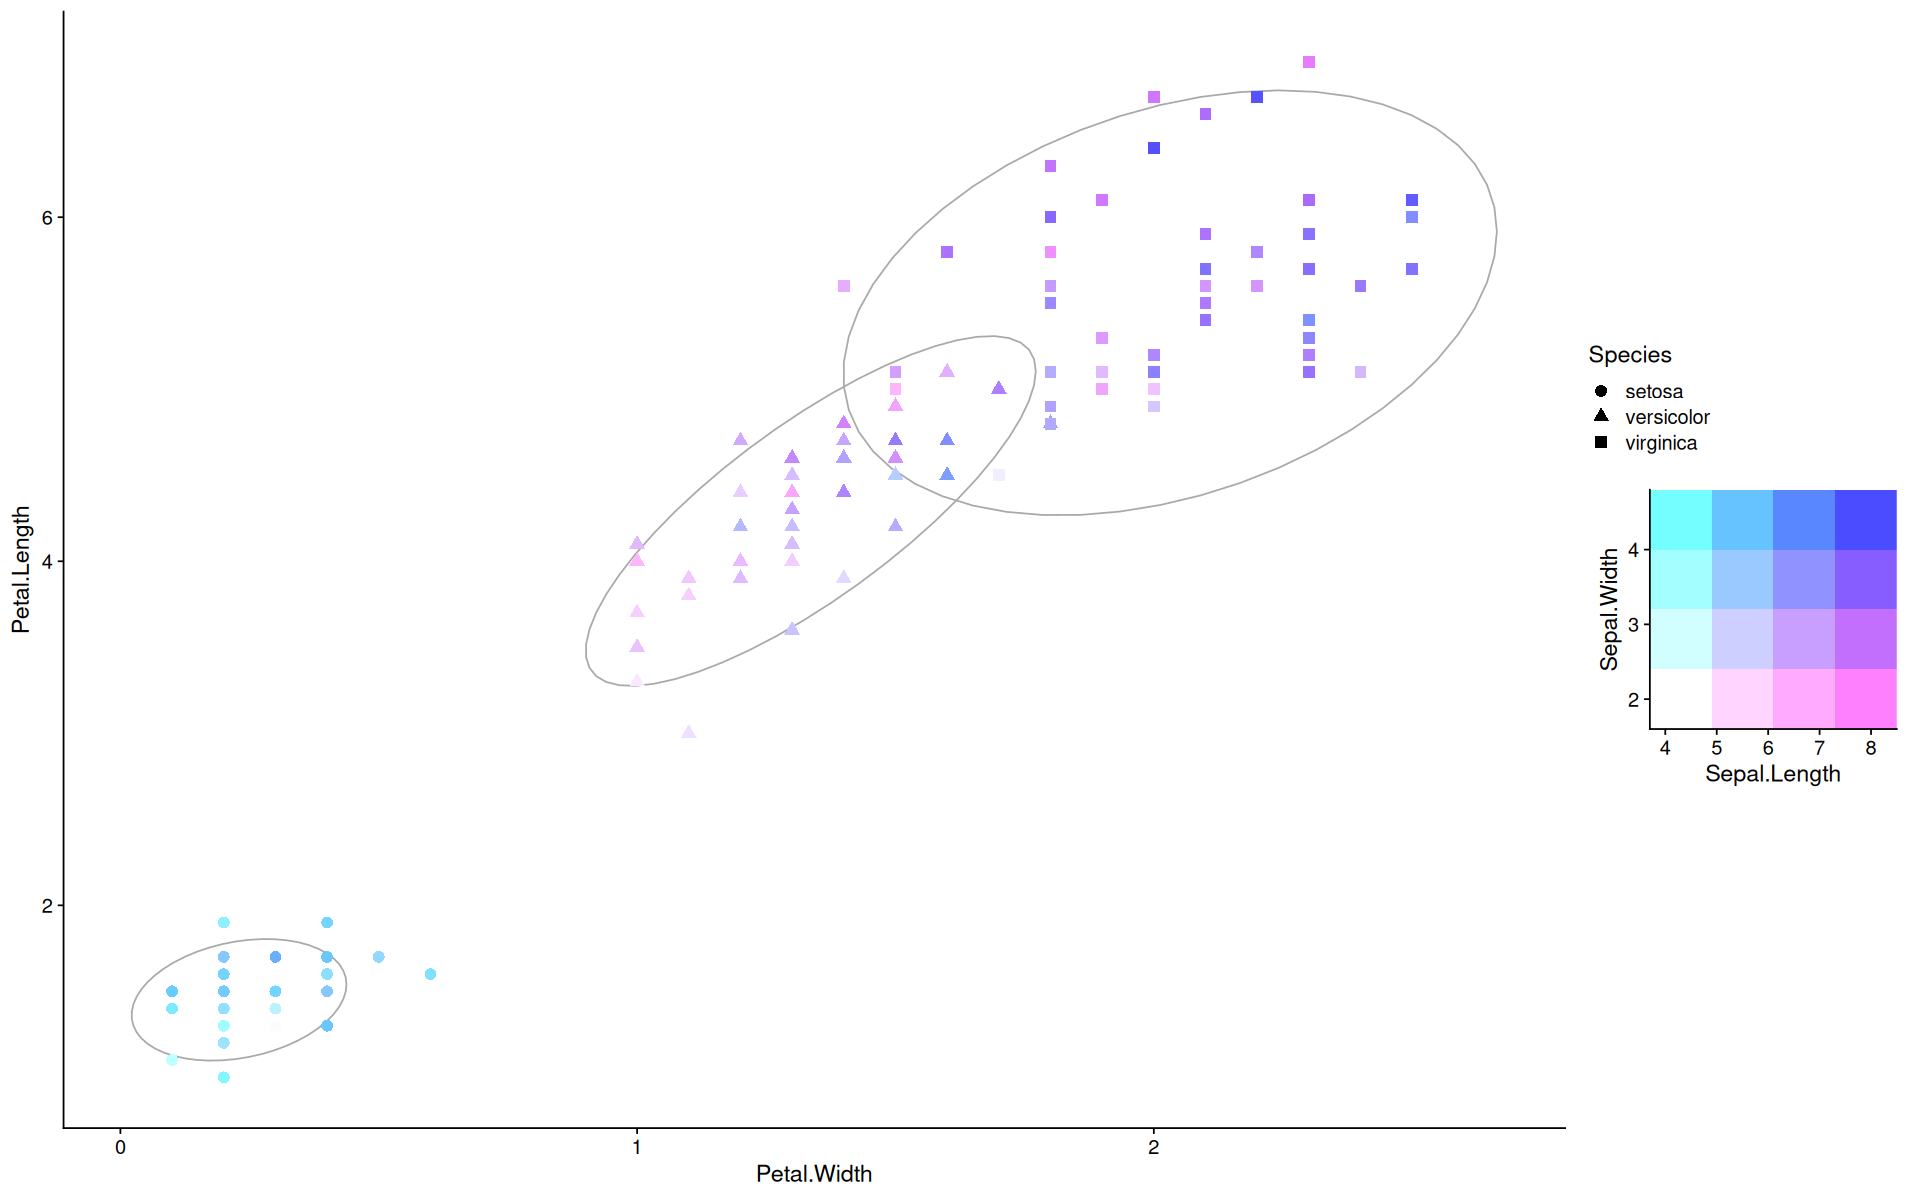

In [30]:
r <- map_to_color2d(iris, xvar=Sepal.Length, yvar=Sepal.Width, colors=arc.bluepink()[c(16,4,1,13)], size=4)

ggplot(r$data, aes(y=Petal.Length, x=Petal.Width, color=color, shape=Species, group=Species)) +
stat_ellipse(color='darkgray') +
geom_point(size=3) +
scale_color_identity() +
guides(custom = guide_custom(as_grob(r$legend), width=unit(0.4,'npc'), height=unit(0.4,'npc')))

In [38]:
tolochko.redblue()

[1] "#dddddd" "#7bb3d1" "#016eae" "#dd7c8a" "#8d6c8f" "#4a4779" "#cc0024"
[8] "#8a274a" "#4b264d"

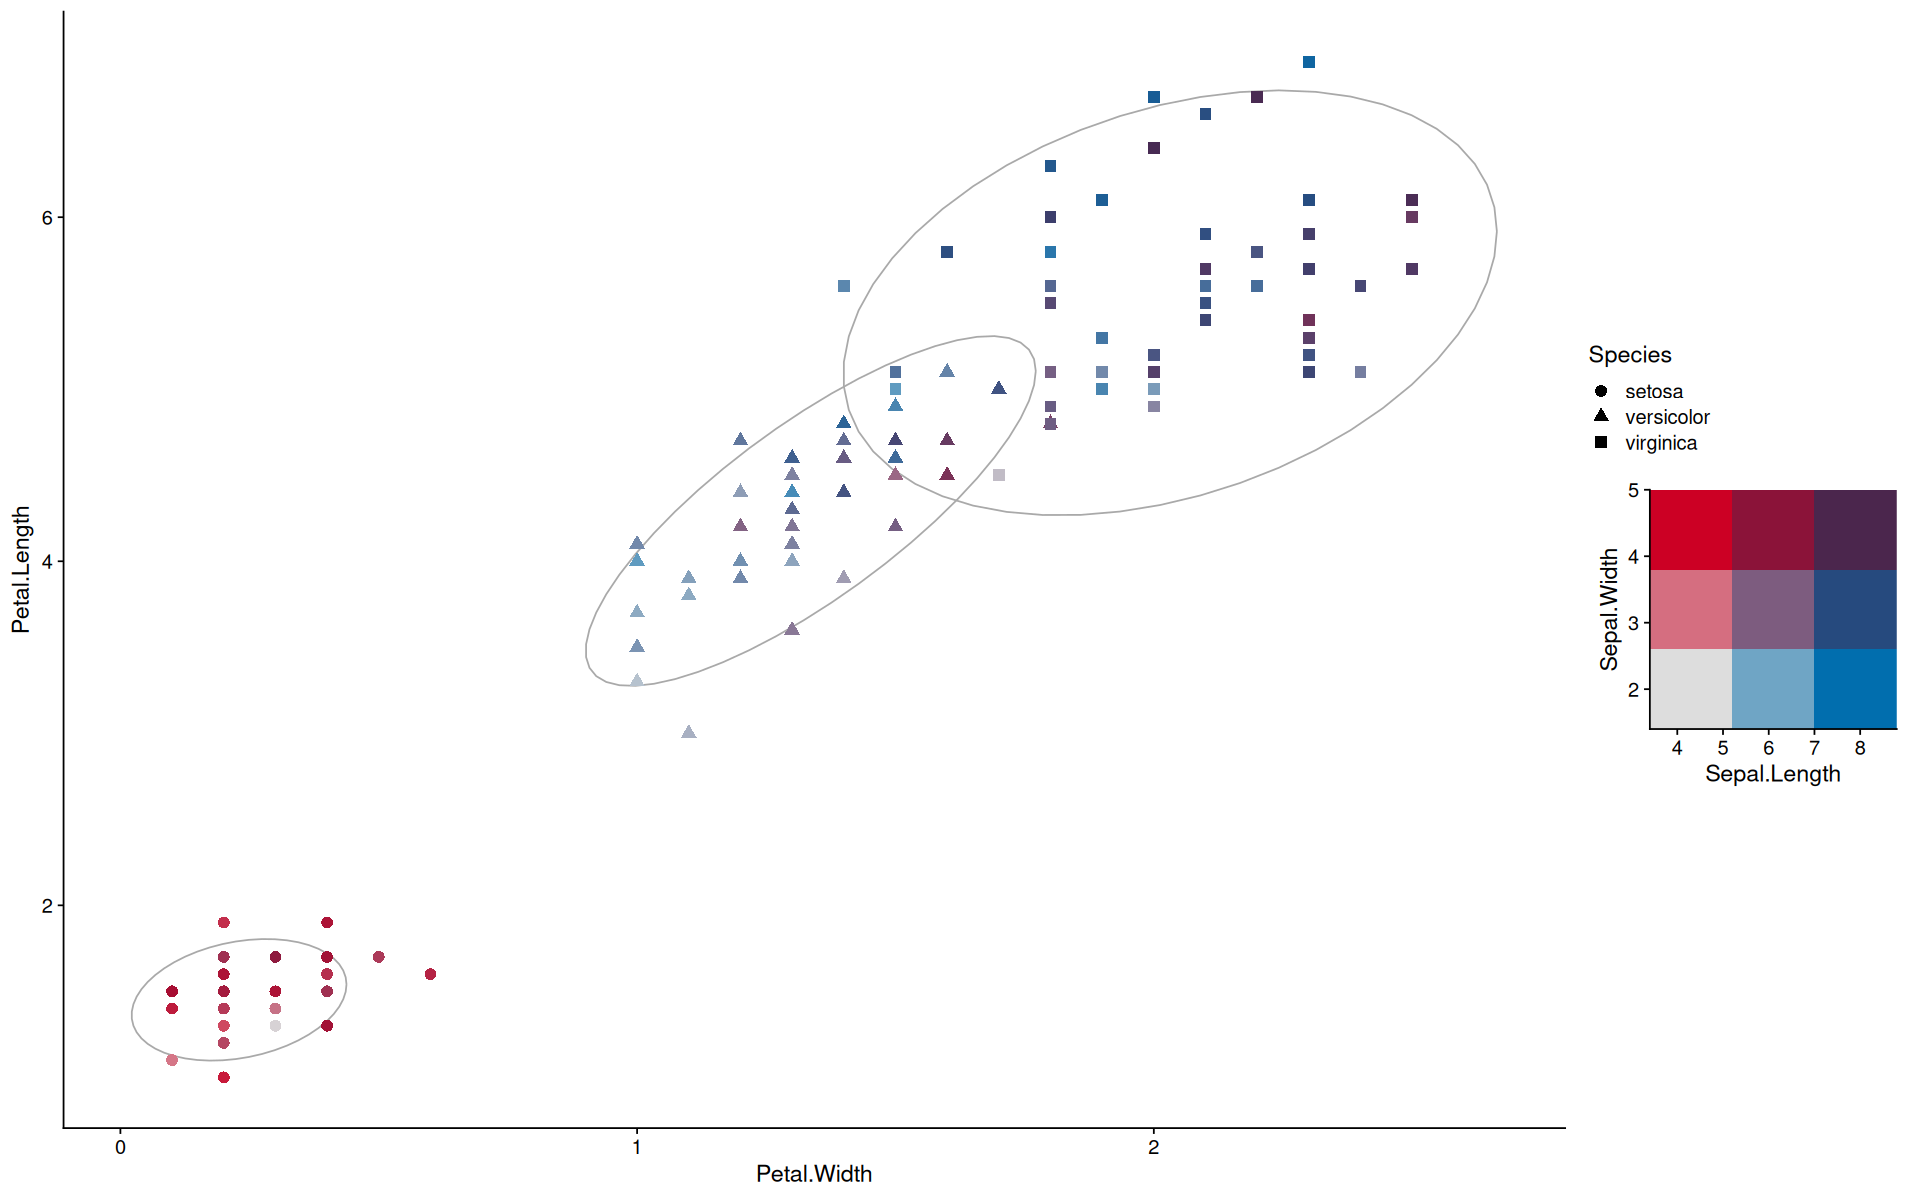

In [39]:
r <- map_to_color2d(iris, xvar=Sepal.Length, yvar=Sepal.Width, colors=tolochko.redblue()[c(9,3,1,7)], size=3)

ggplot(r$data, aes(y=Petal.Length, x=Petal.Width, color=color, shape=Species, group=Species)) +
stat_ellipse(color='darkgray') +
geom_point(size=3) +
scale_color_identity() +
guides(custom = guide_custom(as_grob(r$legend), width=unit(0.4,'npc'), height=unit(0.4,'npc')))